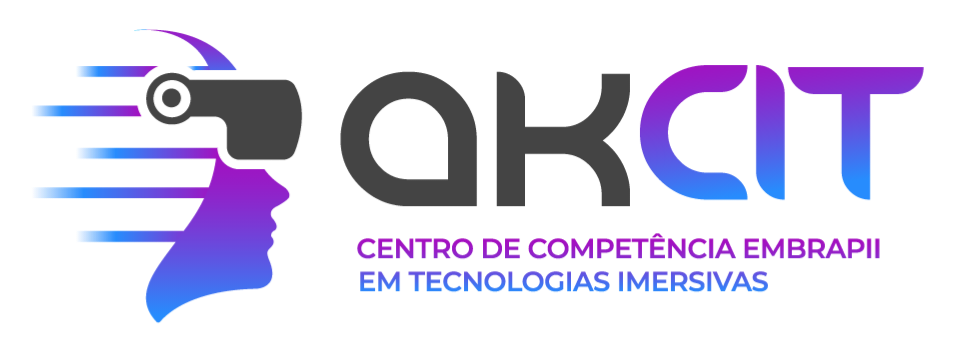

# Objetivos de Aprendizagem

- Fazer uma análise exploratória inicial no conjunto de dados Iris
- Entender o funcionamento da Análise Discriminante Linear (LDA)
- Entender o funcionamento da Análise Discriminante Quadrática (QDA)
- Entender o funcionamento da Análise Discriminante Regularizada (RDA)


# Análise Exploratória do dataset Iris

O conjunto de dados **Iris** é amplamente reconhecido e utilizado em estatística e aprendizado de máquina, especialmente como exemplo introdutório para a aplicação de técnicas de classificação. Este conjunto de dados consiste em 150 amostras de flores pertencentes à espécie **Iris**, distribuídas igualmente entre três subespécies: **Iris setosa**, **Iris versicolor** e **Iris virginica**.

Cada amostra no conjunto de dados é caracterizada por quatro variáveis numéricas que descrevem atributos morfológicos das flores:
- **Comprimento da sépala** (em centímetros);
- **Largura da sépala** (em centímetros);
- **Comprimento da pétala** (em centímetros);
- **Largura da pétala** (em centímetros).

Devido à sua simplicidade, equilíbrio e bem-definidas classes, o conjunto de dados Iris é frequentemente empregado para ilustrar algoritmos de classificação e técnicas de análise exploratória de dados.




In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o conjunto de dados Iris, incluindo um dataframe
# Essa função retorna um dicionário, com vários itens
iris = load_iris(as_frame=True)

# Guarda o item 'frame' do dicionario como df
df = iris.frame

# Mostra os primeiros dados do dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Note que a coluna target está em função de valores numéricos
# Para melhor entender, será adicionado uma coluna que converte esse número para a espécie da flor


# Acessando os nomes das espécies
# Segundo a documentação do sklearn, os valores dos rótulos estão contidos no dicionário do load_iris()
# Guarda o item 'target_names' do dicionario como df
target_names = iris.target_names

# Adicionando uma nova coluna com os nomes das espécies
df['species'] = target_names[df['target']]

# Visualizando o DataFrame
# Observe a última coluna com o nome das espécies
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


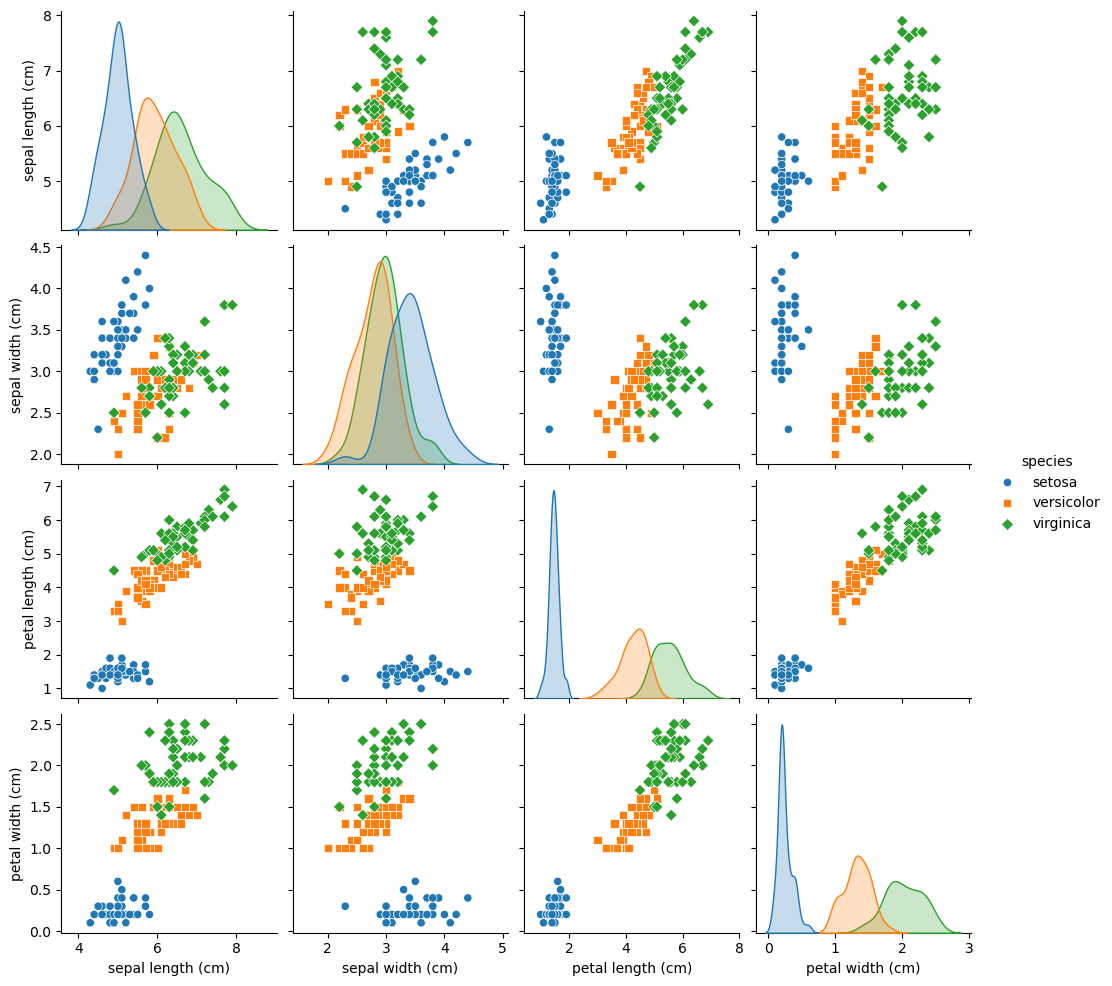

In [3]:
# Apresenta um gráfico com os dados do dataset iris
# Cada gráfico é composto de 16 minigráficos
# Cada minigráfico possui uma característica no eixo x e outra no eixo y
# Essa apresentação facilita o entendimento de todo o dataset e dá um panorama geral dos dados
ax = sns.pairplot(df.drop(columns='target'), hue='species', markers=["o", "s", "D"])

# Análise Discriminante Linear (LDA)

Análise Discriminante Linear (LDA) é um poderoso método de classificação que opera projetando um conjunto de dados em um espaço de menor dimensionalidade com boa separabilidade de classes. É utilizada em estatística, reconhecimento de padrões e aprendizado de máquina para encontrar uma combinação linear de características que caracterizam ou separam duas ou mais classes de objetos ou eventos. A combinação resultante pode ser usada como um classificador linear ou, mais comumente, para redução de dimensionalidade antes da classificação posterior. A LDA é particularmente eficaz para problemas de classificação multiclasse.


**Vantagens**:

Algumas vantagens do LDA residem no fato de que é um método linear, o que o torna computacionalmente eficiente e fácil de implementar, especialmente em grandes conjuntos de dados.

Ele é capaz de reduzir a dimensionalidade dos dados, projetando-os em um espaço de menor dimensão, onde as classes são mais separáveis. Isso é particularmente útil para visualização e para melhorar o desempenho de outros algoritmos de aprendizado.

Ao maximizar a separação entre as classes, o LDA é eficaz em situações onde as classes são linearmente separáveis.

O LDA funciona bem em cenários onde as classes são aproximadamente balanceadas e com distribuições gaussianas, oferecendo bom desempenho.


**Objetivo**:

Nesse exemplo o objetivo é criar 2 novas características que representem as 4 já existentes de forma que melhor separem as 3 espécies.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Separar em X os dados com as características
X = df.iloc[:, :-2].values
# Separar em y os dados com as espécies
y = df.iloc[:, -1].values

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o modelo LDA para redução em 2 componentes
lda = LinearDiscriminantAnalysis(n_components=2)

# Treina com os valroes de X_train e y_train
# obtem um novo X (X_train_lda) de dimensionalidade 2 com base no X_train
X_train_lda = lda.fit_transform(X_train, y_train)
# Com o modelo treinado co X_train e y_train
# obtem um novo X (X_test_lda) de dimensionalidade 2, com base no X_test
X_test_lda = lda.transform(X_test)

In [5]:
# Observe como o novo X (X_train_lda) agora possui apenas 2 características
print(f"Tamanho do X_train: {X_train.shape[1]}")
print(f"Tamanho do X_train_lda: {X_train_lda.shape[1]}")

# O mesmo ocorre com o conjunto X_test
print(f"Tamanho do X_test: {X_test.shape[1]}")
print(f"Tamanho do X_test_lda: {X_test_lda.shape[1]}")

Tamanho do X_train: 4
Tamanho do X_train_lda: 2
Tamanho do X_test: 4
Tamanho do X_test_lda: 2


O LDA criou essas duas características visando a máxima separação entre as classes, mas resta saber se foi efetivo, ou seja, será que com apenas essas duas classes é possível identificar as espécies?

Abaixo veremos se isso ocorre.

In [6]:
# Coloca os dados do X_train_lda e y_train em um dataframe para melhor visualização
df_lda_train = pd.DataFrame(X_train_lda, columns=['LDA Component 1','LDA Component 2'])
df_lda_train['species']=y_train

df_lda_train.head()

,LDA Component 1,LDA Component 2,species
0,-0.514612,1.882729,versicolor
1,-3.549638,0.715341,virginica
2,-4.527751,-0.400175,virginica
3,-1.036480,-0.011181,versicolor
4,-5.975968,-2.759810,virginica


<Axes: xlabel='LDA Component 1', ylabel='LDA Component 2'>

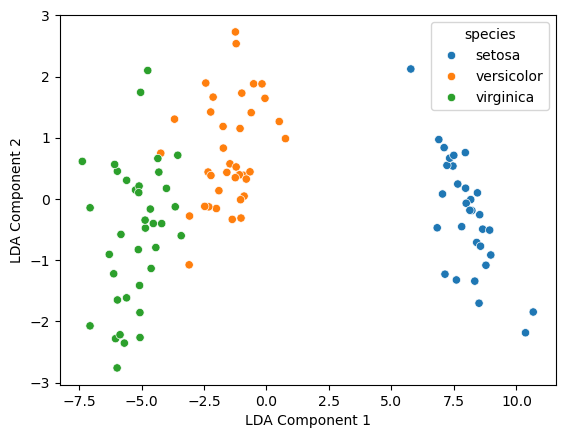

In [7]:
# Plota os valores do X_train_lda
# o sort_values é apenas para que as spécies apareçam em uma determinada ordem
sns.scatterplot(df_lda_train.sort_values(by='species'), x='LDA Component 1', y='LDA Component 2', hue='species')

<Axes: xlabel='LDA Component 1', ylabel='LDA Component 2'>

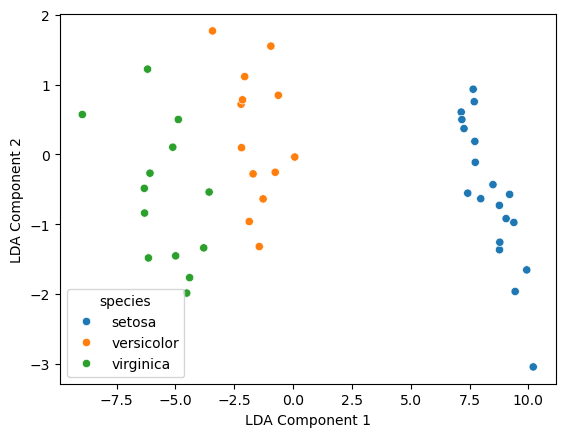

In [8]:
# Repetindo para o X_test

# Coloca os dados do X_test_lda e y_test em um dataframe para melhor visualização
df_lda_test = pd.DataFrame(X_test_lda, columns=['LDA Component 1','LDA Component 2'])
df_lda_test['species']=y_test

# Plota os valores do X_train_lda
# o sort_values é apenas para que as spécies apareçam em uma determinada ordem
sns.scatterplot(df_lda_test.sort_values(by='species'), x='LDA Component 1', y='LDA Component 2', hue='species')

**Análise dos gráficos**

Compare ambos gráficos (Treino e Test).

Note como é praticamente possível separar as 3 especies apenas com linhas verticais a partir do LDA Component 1. Isso é mais visível na classe setosa, porém a fronteira entre as classes virginica e versicolor está bem definida, apesar de, no caso do uso de uma regressão linear, alguns poucos pontos do conjunto de treino poderem ser classificados equivocadamente. Já no caso do teste há clara divisão.



Os gráficos apresentado são o resultado do LDA, no entanto não é possível dizer se ele foi efetivo em classificar corretamente. É necessário comparar com o "gabarito".

In [9]:
# Obtem as predições dos dados com base nos modelos treinados
y_pred_lda_train = lda.predict(X_train)
y_pred_lda_test = lda.predict(X_test)

# Adicionar aos dataframes
df_lda_train['species_predicted'] = y_pred_lda_train
df_lda_test['species_predicted'] = y_pred_lda_test

df_lda_train.head()

,LDA Component 1,LDA Component 2,species,species_predicted
0,-0.514612,1.882729,versicolor,versicolor
1,-3.549638,0.715341,virginica,versicolor
2,-4.527751,-0.400175,virginica,virginica
3,-1.036480,-0.011181,versicolor,versicolor
4,-5.975968,-2.759810,virginica,virginica


Notem como o LDA fez um excelente trabalho reduzindo a dimensionalidade do dataset e ainda mantendo uma excelente performance (elevada acurácia).

- Acertou 97% dos dados de TREINO
- Acertou 100% dos dados de TESTE

In [10]:
# Calculando a acurácia do modelo, comparando o gabarito (y_train) com os valores do modelo y_pred_lda_train
lda_train_acc = accuracy_score(y_train, y_pred_lda_train)
print(f"Acurácia do LDA no dataset de Treino: {lda_train_acc}")

# Calculando a acurácia do modelo, comparando o gabarito (y_test) com os valores do modelo y_pred_lda_test
lda_test_acc =accuracy_score(y_test, y_pred_lda_test)
print(f"Acurácia do LDA no dataset de Teste: {lda_test_acc}")

Acurácia do LDA no dataset de Treino: 0.9714285714285714
Acurácia do LDA no dataset de Teste: 1.0


In [11]:
# Identificando quais foram os casos de erros
df_lda_train_erros = df_lda_train.query("species != species_predicted")

# Foram apenas 3 erros e estão listados abaixo
df_lda_train_erros.head()

,LDA Component 1,LDA Component 2,species,species_predicted
1,-3.549638,0.715341,virginica,versicolor
44,-3.094060,-1.075211,versicolor,virginica
47,-4.228972,0.748766,versicolor,virginica


Observando o gráfico abaixo, fica claro que os erros ocorreram mesmo na fronteira entre virginica e versicolor.

<Axes: xlabel='LDA Component 1', ylabel='LDA Component 2'>

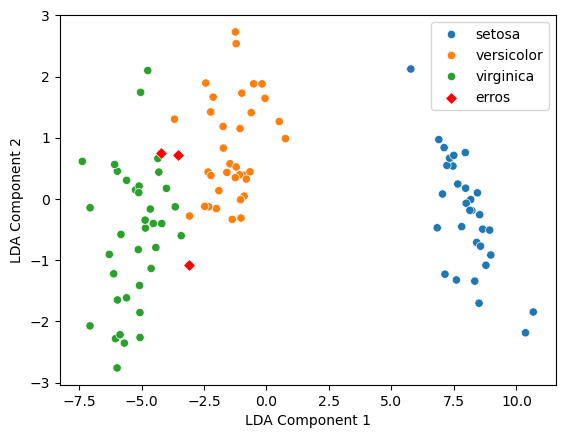

In [12]:
# Gráficos mostrando onde foram os erros
sns.scatterplot(df_lda_train.sort_values(by='species'), x='LDA Component 1', y='LDA Component 2', hue='species')
sns.scatterplot(df_lda_train_erros.sort_values(by='species'), x='LDA Component 1', y='LDA Component 2', color='red', marker='D', label='erros')

# Análise Discriminante Quadrática (QDA)

O Análise Discriminante Quadrática (QDA) é um algoritmo de classificação que, assim como o LDA, busca separar classes de dados, mas difere na suposição de que as variâncias das classes não são iguais. Enquanto o LDA assume que todas as classes compartilham a mesma matriz de covariância e, portanto, traça limiares de decisão lineares, o QDA permite que cada classe tenha sua própria matriz de covariância, resultando em limiares de decisão quadráticos. Essa flexibilidade torna o QDA mais adequado para problemas onde as fronteiras de decisão entre as classes são não-lineares e as classes têm distribuições com diferentes variâncias.

**Vantagens**:

As principais vantagens do QDA incluem sua capacidade de modelar limites de decisão mais complexos, o que é especialmente útil em situações onde os dados não seguem distribuições gaussianas idênticas entre as classes. O QDA pode capturar padrões mais complexos, o que pode levar a um melhor desempenho em classificações onde as classes são não-linearmente separáveis. Além disso, o QDA é mais flexível do que o LDA, o que permite uma adaptação mais precisa aos dados, embora essa maior flexibilidade também possa aumentar o risco de overfitting, especialmente em conjuntos de dados pequenos ou com muitas dimensões.

**Objetivo**:

Nesse exemplo o objetivo é identificar corretamente através das 4 características as 3 espécies.

Nesse exemplo será utilizado o mesmo dataset Iris importado anteriormente

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Separar em X os dados com as características
X = df.iloc[:, :-2].values
# Separar em y os dados com as espécies
y = df.iloc[:, -1].values

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria e treina o modelo QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Obtem as predições dos dados com base nos modelos treinados
y_pred_qda_train = qda.predict(X_train)
y_pred_qda_test = qda.predict(X_test)

# Exercício

## Exercício 1

Utilizando os dados gerados anteriormente, verifique a acurácia do QDA nos conjuntos de Treino e Validação. Quais são esses valores?

**Resposta**: os valores são 98% no Treino e 100% no teste. O código abaixo traz a solução

In [14]:
# Calculando a acurácia do modelo, comparando o gabarito (y_train) com os valores do modelo y_pred_lda_train
qda_train_acc = accuracy_score(y_train, y_pred_qda_train)
print(f"Acurácia do QDA no dataset de Treino: {qda_train_acc}")

# Calculando a acurácia do modelo, comparando o gabarito (y_test) com os valores do modelo y_pred_lda_test
qda_test_acc =accuracy_score(y_test, y_pred_qda_test)
print(f"Acurácia do QDA no dataset de Teste: {qda_test_acc}")

Acurácia do QDA no dataset de Treino: 0.9809523809523809
Acurácia do QDA no dataset de Teste: 1.0


## Exercício 2

Com base no `df_qda_train` e nos dados criados nessa seção, liste os index do `df_qda_train` em que o QDA **errou** na classificação.

**Resposta**: Os index são 1 e 47. Os códigos abaixos esclarecem esse valor

In [15]:
# Para verificarmos onde foi o erro, é criado um dataframe para melhor visualização
# df.iloc[:, :-2].columns utiliza os rótulos do df eliminando as últimas 2 colunas
df_qda_train = pd.DataFrame(X_train, columns=df.iloc[:, :-2].columns)
df_qda_train['species']=y_train

# Adicionar aos dataframes
df_qda_train['species_predicted'] = y_pred_qda_train

df_qda_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
0,5.5,2.4,3.7,1.0,versicolor,versicolor
1,6.3,2.8,5.1,1.5,virginica,versicolor
2,6.4,3.1,5.5,1.8,virginica,virginica
3,6.6,3.0,4.4,1.4,versicolor,versicolor
4,7.2,3.6,6.1,2.5,virginica,virginica


In [16]:
# Identificando quais foram os casos de erros
df_qda_train_erros = df_qda_train.query("species != species_predicted")

# Foram apenas 2 erros e estão listados abaixo
# Note pelo número do index, que eles também tinham sido classificados erroneamente no LDA
df_qda_train_erros.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
1,6.3,2.8,5.1,1.5,virginica,versicolor
47,6.0,2.7,5.1,1.6,versicolor,virginica


# Análise Discriminante Regularizada (RDA)

A Análise Discriminante Regularizada (RDA) é uma extensão tanto do Linear Discriminant Analysis (LDA) quanto do Quadratic Discriminant Analysis (QDA). Enquanto o LDA assume que todas as classes têm a mesma matriz de covariância e o QDA permite diferentes matrizes de covariância para cada classe, o RDA introduz um parâmetro de regularização que ajusta o grau de suavização entre essas duas abordagens. Essencialmente, o RDA permite um trade-off controlável entre a simplicidade do LDA e a flexibilidade do QDA, tornando-o adequado para situações em que se deseja evitar o overfitting (comum no QDA) ou underfitting (potencial no LDA).

**Vantagens**:

As principais vantagens do RDA incluem sua flexibilidade e capacidade de adaptação. O uso do parâmetro de regularização permite que o RDA se ajuste melhor aos dados, especialmente em cenários onde as suposições estritas do LDA (matrizes de covariância iguais) são demasiado simplistas, e o QDA, com sua abordagem mais flexível, pode ser propenso ao overfitting. Essa regularização permite que o RDA ofereça um desempenho mais robusto, equilibrando a capacidade de generalização e a modelagem precisa dos dados. Isso é particularmente útil em contextos com conjuntos de dados limitados ou com muitas variáveis, onde escolher o modelo correto entre LDA e QDA pode ser desafiador.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Separar em X os dados com as características
X = df.iloc[:, :-2].values
# Separar em y os dados com as espécies
y = df.iloc[:, -1].values

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria e treina o modelo RDA (usando LDA com shrinkage)
rda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
rda.fit(X_train, y_train)

# Obtem as predições dos dados com base nos modelos treinados
y_pred_rda_train = rda.predict(X_train)
y_pred_rda_test = rda.predict(X_test)

In [18]:
# Calculando a acurácia do modelo, comparando o gabarito (y_train) com os valores do modelo y_pred_lda_train
rda_train_acc = accuracy_score(y_train, y_pred_rda_train)
print(f"Acurácia do RDA no dataset de Treino: {rda_train_acc}")

# Calculando a acurácia do modelo, comparando o gabarito (y_test) com os valores do modelo y_pred_lda_test
rda_test_acc =accuracy_score(y_test, y_pred_rda_test)
print(f"Acurácia do RDA no dataset de Teste: {rda_test_acc}")

Acurácia do RDA no dataset de Treino: 0.9714285714285714
Acurácia do RDA no dataset de Teste: 1.0


In [19]:
# Para verificarmos onde foi o erro, é criado um dataframe para melhor visualização
# df.iloc[:, :-2].columns utiliza os rótulos do df eliminando as últimas 2 colunas
df_rda_train = pd.DataFrame(X_train, columns=df.iloc[:, :-2].columns)
df_rda_train['species']=y_train

# Adicionar aos dataframes
df_rda_train['species_predicted'] = y_pred_rda_train

df_rda_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
0,5.5,2.4,3.7,1.0,versicolor,versicolor
1,6.3,2.8,5.1,1.5,virginica,versicolor
2,6.4,3.1,5.5,1.8,virginica,virginica
3,6.6,3.0,4.4,1.4,versicolor,versicolor
4,7.2,3.6,6.1,2.5,virginica,virginica


In [20]:
# Identificando quais foram os casos de erros
df_rda_train_erros = df_rda_train.query("species != species_predicted")

# Foram apenas 3 erros e estão listados abaixo
# Note pelo número do index, que eles também tinham sido classificados erroneamente no LDA
df_rda_train_erros.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
1,6.3,2.8,5.1,1.5,virginica,versicolor
44,5.9,3.2,4.8,1.8,versicolor,virginica
47,6.0,2.7,5.1,1.6,versicolor,virginica
